# House Price Prediciton Model 

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

## Importing Datasets and Anaylis

In [39]:
hp_df = fetch_california_housing(as_frame=True).frame

In [40]:
# hp_df = pd.read_csv("../Datasets/Realestate.csv")
# hp_df.drop(columns=["No"], inplace=True)

In [41]:
hp_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [42]:
hp_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [43]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [44]:
hp_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: >

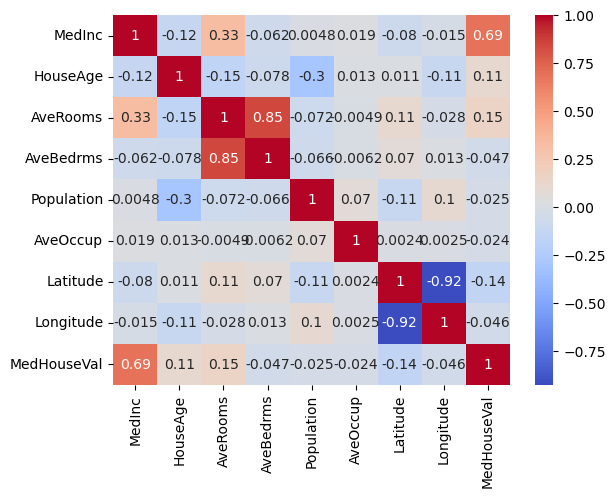

In [45]:
sns.heatmap(hp_df.corr(), annot=True, cmap='coolwarm')

In [46]:
hp_df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [47]:
hp_df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [48]:
hp_df.shape

(20640, 9)

In [51]:
# Split features and target
X = hp_df.drop('MedHouseVal', axis=1)
y = hp_df['MedHouseVal']


In [52]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define models and their parameter grids
models_params = [
    ('LinearRegression', LinearRegression(), {}),
    ('Ridge', Ridge(), {'reg__alpha': [0.1, 1.0, 10.0]}),
    ('Lasso', Lasso(), {'reg__alpha': [0.001, 0.01, 0.1, 1.0]}),
    ('RandomForest', RandomForestRegressor(random_state=42), {'reg__n_estimators': [50, 100], 'reg__max_depth': [5, 10]}),
    ('XGBRegressor', XGBRegressor(random_state=42, verbosity=0), {'reg__n_estimators': [50, 100], 'reg__max_depth': [3, 6]})
]

results = {}

for name, model, params in models_params:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reg', model)
    ])
    grid = GridSearchCV(pipe, param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {
        'Best Params': grid.best_params_,
        'Test MSE': mse,
        'Test R2': r2
    }
    print(f"{name}: Best Params={grid.best_params_}, Test MSE={mse:.4f}, Test R2={r2:.4f}")


LinearRegression: Best Params={}, Test MSE=0.5559, Test R2=0.5758
Ridge: Best Params={'reg__alpha': 0.1}, Test MSE=0.5559, Test R2=0.5758
Lasso: Best Params={'reg__alpha': 0.001}, Test MSE=0.5545, Test R2=0.5769
RandomForest: Best Params={'reg__max_depth': 10, 'reg__n_estimators': 100}, Test MSE=0.2963, Test R2=0.7739
XGBRegressor: Best Params={'reg__max_depth': 6, 'reg__n_estimators': 100}, Test MSE=0.2226, Test R2=0.8301


In [56]:
# Show all results
import pandas as pd
results_df = pd.DataFrame(results)
results_df.T.head()

,Best Params,Test MSE,Test R2
LinearRegression,{},0.555892,0.575788
Ridge,{'reg__alpha': 0.1},0.555888,0.575791
Lasso,{'reg__alpha': 0.001},0.554491,0.576856
RandomForest,"{'reg__max_depth': 10, 'reg__n_estimators': 100}",0.296298,0.773889
XGBRegressor,"{'reg__max_depth': 6, 'reg__n_estimators': 100}",0.22259,0.830137


In [57]:
import joblib

# Find the best model based on R2 score
best_model_name = max(results, key=lambda k: results[k]['Test R2'])
print(f"Best model: {best_model_name}")

# Refit the best model on the full training data
for name, model, params in models_params:
    if name == best_model_name:
        best_pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('reg', model)
        ])
        grid = GridSearchCV(best_pipe, param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid.fit(X_train, y_train)
        # Save the best estimator
        # joblib.dump(grid.best_estimator_, 'best_house_price_model.pkl')
        # print("Best model saved as 'best_house_price_model.pkl'")
        # Predict on test set
        y_pred = grid.predict(X_test)
        print(f"Test R2: {r2_score(y_test, y_pred):.4f}")
        print(f"Test MSE: {mean_squared_error(y_test, y_pred):.4f}")

Best model: XGBRegressor
Test R2: 0.8301
Test MSE: 0.2226


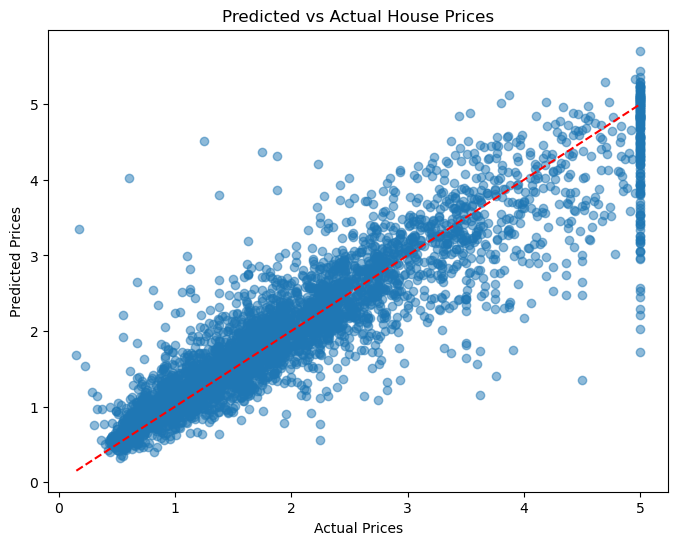

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()